In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Exploratory Data Analysis</h1>

<h2>Reading DAP_2022_DogOverview_v1.0.csv</h2> 
The dog overview dataset contains 35 variables, providing information about 43517 dogs (35 columns 43517 rows). <br> <br>

<b>MISSING DATA</b> <br>
There are 17 columns with missing data points, but these missing data points are insignificant for our purposes as they do not provide important identifying information for each dog's condition.

In [56]:
dog_overview = pd.read_csv('DAP_2022_DogOverview_v1.0.csv', low_memory=False)

# number of columns
num_columns = dog_overview.shape[1]
print(f"Number of rows: {len(dog_overview)}")
print(f"Number of columns: {num_columns}")

dog_overview.describe(include='all')

Number of rows: 43517
Number of columns: 35


,dog_id,DAP_Pack_Date,Cohort,Cohort_Enroll_Date,Estimated_DOB,Estimated_Age_Years_at_HLES,AgeDOB_Estimation_Method,Dog_Reported_Deceased,DOD,Breed_Status,...,DNA_Swab_ID,PrimaryAddress_HLES,SecondaryAddress_HLES,PrimaryAddress_AFUS2021,SecondaryAddress_AFUS2021,PrimaryAddress_AFUS2022,SecondaryAddress_AFUS2022,PrimaryAddress_AFUS2023,SecondaryAddress_AFUS2023,PrimaryAddress_HLES_YEAR
count,43517.000000,43517,43517,6497,43513,43513.000000,43517,43517,5222,43517,...,7.425000e+03,43517,43517,27443,4275,43063,4275,0.0,0.0,43063.000000
unique,NaN,1028,3,648,3611,NaN,4,2,903,2,...,NaN,2,2,2,1,1,1,NaN,NaN,NaN
top,NaN,2020-10-12,DAP Pack,2022-01-04,2018-06-15,NaN,Estimated using owner-reported birth year and ...,N,2022-11-21,Purebred,...,NaN,Y,N,N,Y,Y,Y,NaN,NaN,NaN
freq,NaN,694,37020,98,489,NaN,32901,37941,16,21910,...,NaN,43063,39242,27149,4275,43063,4275,NaN,NaN,NaN
mean,69843.099203,NaN,NaN,NaN,NaN,6.813495,NaN,NaN,NaN,NaN,...,3.108221e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.603697
std,37044.068561,NaN,NaN,NaN,NaN,4.312415,NaN,NaN,NaN,NaN,...,8.964269e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.850442
min,8.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,3.102006e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000
25%,38576.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,...,3.102006e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000
50%,75153.000000,NaN,NaN,NaN,NaN,6.400000,NaN,NaN,NaN,NaN,...,3.102006e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000
75%,100006.000000,NaN,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,...,3.121105e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.000000


Cohort_Enroll_Date             37020
Estimated_DOB                      4
Estimated_Age_Years_at_HLES        4
DOD                            38295
CSLB_2020_Complete             17793
CSLB_2021_Complete             13434
CSLB_2022_Complete              7089
AFUS_Year2_Complete            16082
AFUS_Year3_Complete            42788
DNA_Swab_ID                    36092
PrimaryAddress_AFUS2021        16074
SecondaryAddress_AFUS2021      39242
PrimaryAddress_AFUS2022          454
SecondaryAddress_AFUS2022      39242
PrimaryAddress_AFUS2023        43517
SecondaryAddress_AFUS2023      43517
PrimaryAddress_HLES_YEAR         454
dtype: int64


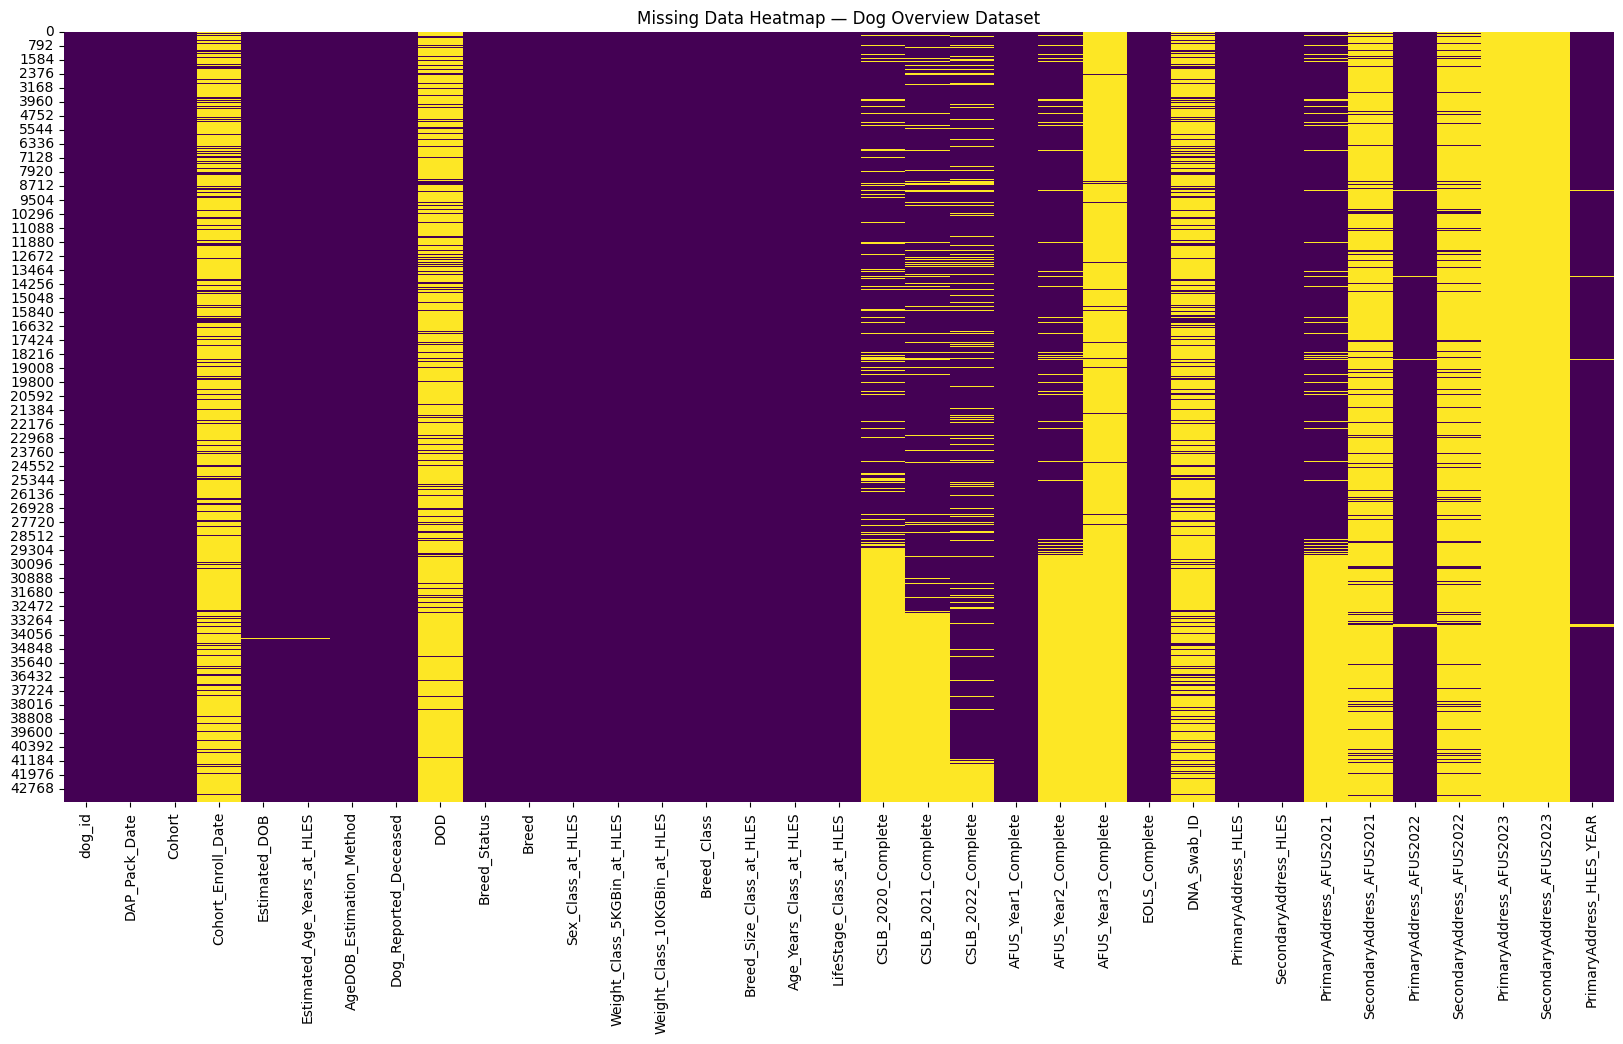

In [57]:
# number of missing data points per column
missing_data = dog_overview.isnull().sum()
missing_data = missing_data[missing_data > 0]
print(missing_data)

# heatmap of missing data points per column
plt.figure(figsize=(20, 10))
sns.heatmap(dog_overview.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap — Dog Overview Dataset")
plt.show()

<b>BREED</b> <br>
Notably, this dataset includes both purebred and mixed breed dogs of 4021 unique breeds. Out of 43517 dogs, 21255 are purebred and 22262 are mixed breeds, close to a 50-50 split. <br>

The most common owner-reported breed is Labrador Retriever, followed by Golden Retriever, German Shepard Dog, Australian Shepherd, and Poodle. The 6th most common breed is Unknown/Unknown — many dogs in this study are undetermined mixed breeds. <br>

The 25 most common pure breeds are: Labrador Retriever, Golden Retriever, German Shepherd Dog, Australian Shepherd, Poodle, Dachshund, Border Collie, Pembroke Welsh Corgi, Chihuahua, Boxer, Beagle, Great Dane, Doberman Pinscher, Siberian Husky, Miniature Schnauzer, Shih Tzu, Cavalier King Charles Spaniel, Havanese, Greyhound, Pug, Boston Terrier, Yorkshire Terrier, English Springer Spaniel, Australian Cattle Dog, and Shetland Sheepdog.

<b>AGE</b> <br>
The average age of the dogs in this study is 6.81 years. The average age of each of the top 5 most common dog breeds is as follows: <br>
Labrador Retriever     6.630265 <br>
Golden Retriever       5.654809 <br>
German Shepherd Dog    5.618268 <br>
Australian Shepherd    6.026225 <br>
Poodle                 6.432886 <br>

<b>SEX</b> <br>
The majority dogs in the dataset are spayed or neutered, and the full sex class distribution is as follows: <br>
19661 Female, spayed <br>
18931 Male, neutered <br>
3004 Male, intact <br>
1921 Female, intact <br>

<b>WEIGHT</b> <br>
Out of the 10 weight HLES classes — {<5 | 5-9.9 | 10-14.9 | 15-19.9 | 20-24.9 | 25-29.9 | 30-34.9 | 35-39.9 | 40-44.9 | 45+} — the most common weight class was the 5-9.9kg category.

In [88]:
# number of unique breeds
unique_breeds = dog_overview['Breed'].unique().tolist()
print(f"Number of unique breeds: {len(unique_breeds)}")

# number of mixed vs purebred dogs
mixed_pure_count = dog_overview['Breed_Class'].value_counts()
mixed_count = mixed_pure_count.iloc[0]
pure_count = mixed_pure_count.iloc[1]
print(f'Number of purebred dogs (AKC-Recognized): {pure_count}')
print(f'Number of mixed breed dogs (Non-AKC-Reognized: {mixed_count}')

# top 10 most common dog breeds
most_common_breeds = dog_overview['Breed'].value_counts()[:10].index.tolist()
print(f"\nTop 10 most common breeds: {most_common_breeds}")

# top 25 most common PURE dog breeds (Breed_Class has 'akc-recognized breed' or 'non-akc-recognized or mixed breed')
purebred_dog_overview = dog_overview[dog_overview['Breed_Class'] == 'akc-recognized breed']
purebred_counts = purebred_dog_overview['Breed'].value_counts()
top_25_purebred_breeds = purebred_counts.head(25)
pd.set_option('display.max_rows', 50)
print(f"\nTop 25 most common pure breeds: {top_25_purebred_breeds}")

# list of each breed that appears its frequency
breed_counts = dog_overview['Breed'].value_counts()

# # bar graph of number of dogs of each breed (too many breeds to be readable...)
# plt.figure(figsize=(20, 8))
# plt.bar(breed_counts.index, breed_counts.values)
# plt.xlabel('Breed')
# plt.xticks(rotation=90, fontsize=6)
# plt.ylabel('Count')
# ax = plt.gca()
# ax.set_ylim([0, 800])
# plt.title('Breeds of Dogs')
# plt.show()

Number of unique breeds: 4021
Number of purebred dogs (AKC-Recognized): 21255
Number of mixed breed dogs (Non-AKC-Reognized: 22262

Top 10 most common breeds: ['Labrador Retriever', 'Golden Retriever', 'German Shepherd Dog', 'Australian Shepherd', 'Poodle', 'Unknown/Unknown', 'Labrador Retriever/Unknown', 'Dachshund', 'Border Collie', 'Golden Retriever/Poodle']

Top 25 most common pure breeds: Breed
Labrador Retriever               2531
Golden Retriever                 2204
German Shepherd Dog              1051
Australian Shepherd               755
Poodle                            745
Dachshund                         541
Border Collie                     504
Pembroke Welsh Corgi              331
Chihuahua                         329
Boxer                             307
Beagle                            303
Great Dane                        299
Doberman Pinscher                 282
Siberian Husky                    277
Miniature Schnauzer               277
Shih Tzu                   

In [59]:
# average age 
average_age = dog_overview['Estimated_Age_Years_at_HLES'].mean()
print(f"Average age: {average_age:.2f} years\n")

# average age for each of the 5 most common dog breeds
top_5_breeds = dog_overview['Breed'].value_counts()[:5].index.tolist()
top_5_breeds_dog_overview = dog_overview[dog_overview['Breed'].isin(top_5_breeds)]
average_age_by_breed = top_5_breeds_dog_overview.groupby('Breed')['Estimated_Age_Years_at_HLES'].mean().reset_index()
average_age_by_breed.columns = ['Breed', 'Average_Age']
print(average_age_by_breed)
print()

# number of dogs in each sex class
sex_class_counts = dog_overview['Sex_Class_at_HLES'].value_counts()
print(sex_class_counts)

# identifying the most common weight class
weight_class_count = dog_overview['Weight_Class_5KGBin_at_HLES'].value_counts()
most_common_weight_class = weight_class_count.idxmax()
most_common_weight_class_count = weight_class_count.max()
print(f"\nMost common weight class: {most_common_weight_class}kg at {most_common_weight_class_count} dogs")

Average age: 6.81 years

                 Breed  Average_Age
0  Australian Shepherd     6.026225
1  German Shepherd Dog     5.618268
2     Golden Retriever     5.654809
3   Labrador Retriever     6.630265
4               Poodle     6.432886

Sex_Class_at_HLES
Female, spayed    19661
Male, neutered    18931
Male, intact       3004
Female, intact     1921
Name: count, dtype: int64

Most common weight class: 5-9.9kg at 6984 dogs


In [60]:
# finding the most common weight class by breed
most_common_weight_class_by_breed = dog_overview.groupby('Breed')['Weight_Class_5KGBin_at_HLES'].agg(lambda x: x.mode().iloc[0]).reset_index()
most_common_weight_class_by_breed.columns = ['Breed', 'Most_Common_Weight_Class'] # renaming the columns for clarity
print(most_common_weight_class_by_breed)

# finding the breeds with the highest proportion of each weight class
breed_counts = dog_overview['Breed'].value_counts()
filtered_breeds = breed_counts[breed_counts > 500].index # filtering out breeds with <500 dogs
filtered_df = dog_overview[dog_overview['Breed'].isin(filtered_breeds)] # filtered DataFrame containing only the breeds with >500 dogs
breed_weight_class_counts = filtered_df.groupby(['Breed', 'Weight_Class_5KGBin_at_HLES']).size().reset_index(name='Count') # count of each weight class for each breed
breed_totals = filtered_df['Breed'].value_counts().reset_index() # total number of dogs in each filtered breed
breed_totals.columns = ['Breed', 'Total']
breed_weight_class_counts = pd.merge(breed_weight_class_counts, breed_totals, on='Breed') # merging the weight class counts with the breed counts
breed_weight_class_counts['Proportion'] = breed_weight_class_counts['Count'] / breed_weight_class_counts['Total'] # proportion of each weight class within each breed
idx = breed_weight_class_counts.groupby('Weight_Class_5KGBin_at_HLES')['Proportion'].idxmax() # finding the breed with the largest proportion for each weight class
largest_proportion_breeds = breed_weight_class_counts.loc[idx, ['Weight_Class_5KGBin_at_HLES', 'Breed', 'Proportion']]
print(largest_proportion_breeds)

                                                  Breed  \
0                                         Affenpinscher   
1                               Affenpinscher/Chihuahua   
2                                Affenpinscher/Shih Tzu   
3                                 Affenpinscher/Unknown   
4                                          Afghan Hound   
5                                   African Village Dog   
6                                      Airedale Terrier   
7                Airedale Terrier/Australian Cattle Dog   
8                       Airedale Terrier/Bearded Collie   
9                   Airedale Terrier/Bluetick Coonhound   
10                       Airedale Terrier/Border Collie   
11               Airedale Terrier/Catahoula Leopard Dog   
12               Airedale Terrier/Flat-Coated Retriever   
13                 Airedale Terrier/German Shepherd Dog   
14                Airedale Terrier/Jack Russell Terrier   
15                  Airedale Terrier/Labrador Retriever 

<h2>Reading DAP_2022_HLES_dog_owner_v1.0.csv</h2> 
The HLES dog owner dataset contains 933 variables, providing information about 43517 dogs (933 columns 43517 rows). <br> <br>

<b>MISSING DATA</b> <br>
There are 756 columns with missing data points, but these missing data points are insignificant for our purposes as they do not provide crucial identifying information about each dog's condition and environment. <br>

<b>COMPARED TO DAP_2022_DogOverview_v1.0.csv</b> <br>
In the dog owner dataset, there are ~350 more purebred dogs than in the dog overview dataset — we can see that the breed status distribution is slightly different even though the number of dogs described in the dataset is the same. <br> <br>
The average age in the dog owner dataset is also different, at 8.07 years instead of 6.81 like in the dog overview dataset.

In [61]:
dog_owner = pd.read_csv('DAP_2022_HLES_dog_owner_v1.0.csv', low_memory=False)

# number of columns
num_columns = dog_owner.shape[1]
print(f"Number of rows: {len(dog_owner)}")
print(f"Number of columns: {num_columns}")

dog_owner.describe(include='all')

Number of rows: 43517
Number of columns: 933


,dog_id,owner_id,st_hles_completion_date,dd_breed_pure_or_mixed,dd_breed_pure,dd_breed_pure_non_akc,dd_breed_mixed_primary,dd_breed_mixed_secondary,dd_age_exact_source_acquired_as_puppy,dd_age_exact_source_registration_information,...,oc_household_child_count,ss_household_dog_count,oc_primary_residence_state,oc_primary_residence_census_division,oc_primary_residence_ownership,oc_primary_residence_time_percentage,oc_secondary_residence,oc_secondary_residence_state,oc_secondary_residence_ownership,oc_secondary_residence_time_percentage
count,43517.000000,43517.000000,43517,43517.000000,21910.000000,116,21607.000000,21607.000000,36000,36000,...,43517.000000,43517.000000,43517,43517.000000,43517.000000,4189.000000,43517,4269,4230.000000,4177.000000
unique,NaN,NaN,1028,NaN,NaN,76,NaN,NaN,2,2,...,NaN,NaN,51,NaN,NaN,NaN,2,51,NaN,NaN
top,NaN,NaN,2020-10-12,NaN,NaN,Shiloh Shepherd,NaN,NaN,True,False,...,NaN,NaN,WA,NaN,NaN,NaN,False,WA,NaN,NaN
freq,NaN,NaN,694,NaN,NaN,8,NaN,NaN,27765,26990,...,NaN,NaN,5240,NaN,NaN,NaN,39242,407,NaN,NaN
mean,69843.099203,22538.586070,NaN,1.496519,128.563122,NaN,145.023835,284.514417,NaN,NaN,...,0.247329,1.666429,NaN,5.620838,3.735827,4.496777,NaN,NaN,16.283452,2.073498
std,37044.068561,13150.184004,NaN,0.499994,69.551300,NaN,178.458964,348.910942,NaN,NaN,...,0.651121,1.087388,NaN,2.707098,13.317533,0.773734,NaN,NaN,34.253078,0.970153
min,8.000000,3.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,NaN,...,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN,NaN,1.000000,1.000000
25%,38576.000000,11195.000000,NaN,1.000000,74.000000,NaN,46.000000,74.000000,NaN,NaN,...,0.000000,1.000000,NaN,3.000000,2.000000,4.000000,NaN,NaN,2.000000,1.000000
50%,75153.000000,22105.000000,NaN,1.000000,120.000000,NaN,120.000000,153.000000,NaN,NaN,...,0.000000,1.000000,NaN,5.000000,2.000000,5.000000,NaN,NaN,2.000000,2.000000
75%,100006.000000,34395.000000,NaN,2.000000,173.000000,NaN,174.000000,230.000000,NaN,NaN,...,0.000000,2.000000,NaN,9.000000,2.000000,5.000000,NaN,NaN,2.000000,3.000000


dd_breed_pure                                                   21607
dd_breed_pure_non_akc                                           43401
dd_breed_mixed_primary                                          21910
dd_breed_mixed_secondary                                        21910
dd_age_exact_source_acquired_as_puppy                            7517
dd_age_exact_source_registration_information                     7517
dd_age_exact_source_determined_by_rescue_org                     7517
dd_age_exact_source_determined_by_veterinarian                   7517
dd_age_exact_source_from_litter_owner_bred                       7517
dd_age_exact_source_other                                        7517
dd_age_exact_source_other_description                           41814
dd_age_estimate_source_told_by_previous_owner                   36000
dd_age_estimate_source_determined_by_rescue_org                 36000
dd_age_estimate_source_determined_by_veterinarian               36000
dd_age_estimate_sour

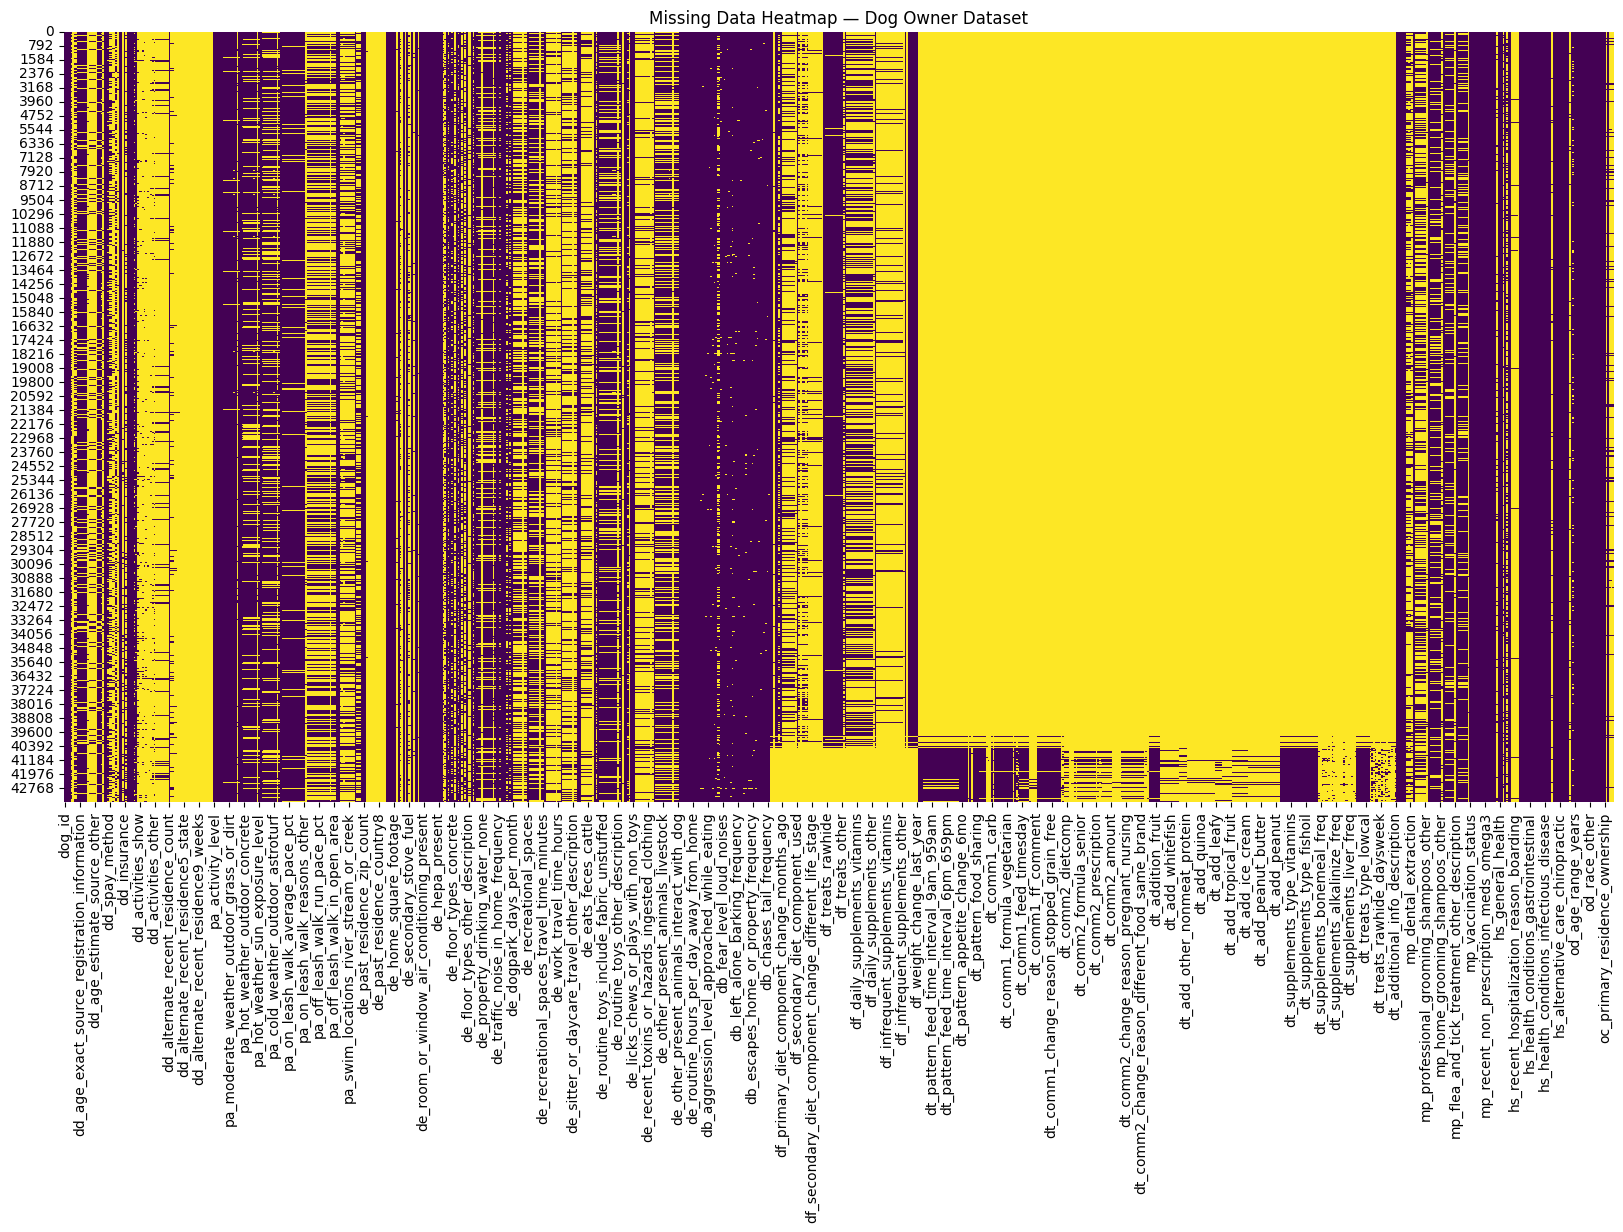

In [62]:
# number of missing data points per column
missing_data = dog_owner.isnull().sum()
missing_data = missing_data[missing_data > 0]
print(missing_data)

# heatmap of missing data points per column
plt.figure(figsize=(20, 10))
sns.heatmap(dog_owner.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap — Dog Owner Dataset")
plt.show()

In [63]:
# number of mixed vs purebred dogs (SLIGHTLY DIFFERENT FROM DOG OVERVIEW)
mixed_pure_count = dog_owner['dd_breed_pure_or_mixed'].value_counts()
mixed_count = mixed_pure_count.iloc[0]
pure_count = mixed_pure_count.iloc[1]
print(f'Number of purebred dogs (AKC-Recognized): {pure_count}')
print(f'Number of mixed breed dogs (Non-AKC-Reognized: {mixed_count}')

# average age (DIFFERENT THAN DOG OVERVIEW)
average_age = dog_owner['dd_age'].mean()
print(f"\nAverage age: {average_age:.2f} years")

Number of purebred dogs (AKC-Recognized): 21607
Number of mixed breed dogs (Non-AKC-Reognized: 21910

Average age: 8.07 years


In [64]:
# counting the top 25 most common pure breeds
pure_breed_names = [
    "Affenpinscher", "Afghan Hound", "Airedale Terrier", "Akita", "Alaskan Malamute",
    "American English Coonhound", "American Eskimo Dog", "American Foxhound", "American Hairless Terrier",
    "American Leopard Hound", "American Pitbull Terrier", "American Staffordshire Terrier", "American Water Spaniel",
    "Anatolian Shepherd Dog", "Appenzeller Sennenhund", "Australian Cattle Dog", "Australian Kelpie",
    "Australian Shepherd", "Australian Stumpy Tail Cattle Dog", "Australian Terrier", "Azawakh", "Barbet", "Basenji",
    "Basset Fauve de Bretagne", "Basset Hound", "Bavarian Mountain Scent Hound", "Beagle", "Bearded Collie", "Beauceron",
    "Bedlington Terrier", "Belgian Laekenois", "Belgian Malinois", "Belgian Sheepdog", "Belgian Tervuren", "Bergamasco",
    "Berger Picard", "Bernese Mountain Dog", "Bichon Frise", "Biewer Terrier", "Black and Tan Coonhound", "Black Mouth Cur",
    "Black Russian Terrier", "Bloodhound", "Blue Lacey", "Bluetick Coonhound", "Boerboel", "Bolognese", "Border Collie",
    "Border Terrier", "Borzoi", "Boston Terrier", "Bouvier des Flandres", "Boxer", "Boykin Spaniel", "Bracco Italiano",
    "Braque de Bourbonnais", "Braque Francais Pyrenean", "Briard", "Brittany", "Broholmer", "Brussels Griffon", "Bull Terrier",
    "Bulldog", "Bullmastiff", "Cairn Terrier", "Canaan Dog", "Cane Corso", "Cardigan Welsh Corgi", "Carolina Dog", 
    "Catahoula Leopard Dog", "Caucasian Shepherd Dog", "Cavalier King Charles Spaniel", "Central Asian Shepherd Dog",
    "Cesky Terrier", "Chesapeake Bay Retriever", "Chihuahua", "Chinese Crested", "Chinese Shar-Pei", "Chinook", "Chow Chow",
    "Cirneco Dell'Etna", "Clumber Spaniel", "Cocker Spaniel", "Collie", "Coton De Tulear", "Croatian Sheepdog", 
    "Curly-Coated Retriever", "Czechoslovakian Vlack", "Dachshund", "Dalmatian", "Dandie Dinmont Terrier", 
    "Danish-Swedish Farmdog", "Deutscher Wachtelhund", "Doberman Pinscher", "Dogo Argentino", "Dogue de Bordeaux",
    "Drentsche Patrijshond", "Drever", "Dutch Shepherd", "English Cocker Spaniel", "English Foxhound", "English Setter",
    "English Shepherd", "English Springer Spaniel", "English Toy Spaniel", "Entlebucher Mountain Dog", "Estrela Mountain Dog",
    "Eurasier", "Field Spaniel", "Finish Spitz", "Finnish Lapphund", "Flat-Coated Retriever", "French Bulldog", "French Spaniel",
    "German Longhaired Pointer", "German Pinscher", "German Shepherd Dog", "German Shorthaired Pointer", "German Spitz",
    "German Wirehaired Pointer", "Giant Schnauzer", "Glen of Imaal Terrier", "Golden Retriever", "Gordon Setter", 
    "Grand Basset Griffon Vendeen", "Great Dane", "Great Pyrenees", "Greater Swiss Mountain Dog", "Greyhound", 
    "Hamiltonstovare", "Hanoverian Scenthound", "Harrier", "Havanese", "Hokkaido", "Hovawart", "Ibizan Hound", 
    "Icelandic Sheepdog", "Irish Red and White Setter", "Irish Setter", "Irish Terrier", "Irish Water Spaniel", "Irish Wolfhound",
    "Italian Greyhound", "Jack Russell Terrier", "Jagdterrier", "Japanese Chin", "Jindo", "Kai Ken", "Karelian Bear Dog", 
    "Keeshond", "Kerry Blue Terrier", "Kishu Ken", "Komondor", "Kromfohrlander", "Kuvasz", "Labrador Retriever", 
    "Lagotto Romagnolo", "Lakeland Terrier", "Lancashire Heeler", "Lapponian Herder", "Leonberger", "Lhasa Apso", "Lowchen",
    "Maltese", "Manchester Terrier", "Mastiff", "Miniature American Shepherd", "Miniature Bull Terrier", "Miniature Pinscher",
    "Miniature Schnauzer", "Mountain Cur", "Mudi", "Neapolitan Mastiff", "Nederlandse Kooikerhondje", "Newfoundland",
    "Norfolk Terrier", "Norrbottenspets", "Norwegian Buhund", "Norwegian Elkhound", "Norwegian Lundhund", "Norwich Terrier",
    "Nova Scotia Duck Tolling Retriever", "Old English Sheepdog", "Otterhound", "Papillon", "Parson Russell Terrier", 
    "Pekingese", "Pembroke Welsh Corgi", "Perro de Presa Canario", "Peruvian Inca Orchid", "Petit Basset Griffon Vendeen", 
    "Pharaoh Hound", "Plott", "Pointer", "Polish Lowland Sheepdog", "Pomeranian", "Poodle", "Poodle (Toy)", "Porcelaine", 
    "Portuguese Podengo", "Portuguese Podengo Pequeno", "Portuguese Pointer", "Portuguese Sheepdog", "Portuguese Water Dog",
    "Pudelpointer", "Pug", "Puli", "Pumi", "Pyrenean Mastiff", "Pyrenean Shepherd", "Rafeiro de Alentejo", "Rat Terrier", 
    "Redbone Coonhound", "Rhodesian Ridgeback", "Romanian Mioritic Shepherd Dog", "Rottweiler", "Russell Terrier", 
    "Russian Toy", "Russian Tsvetnaya Bolonka", "Saluki", "Samoyed", "Schapendoes", "Schipperke", "Scottish Deerhound", 
    "Scottish Terrier", "Sealyham Terrier", "Segugio Italiano", "Shetland Sheepdog", "Shiba Inu", "Shih Tzu", "Shikoku", 
    "Siberian Husky", "Silken Windhound", "Silky Terrier", "Skye Terrier", "Sloughi", "Slovakian Wirehaired Pointer", 
    "Slovensky Cuvac", "Slovensky Kopov", "Small Musterlander Pointer", "Smooth Fox Terrier", "Soft Coated Wheaten Terrier", 
    "Spanish Mastiff", "Spanish Water Dog", "Spinone Italiano", "St. Bernard", "Stabyhoun", "Staffordshire Bull Terrier", 
    "Standard Schnauzer", "Sussex Spaniel", "Swedish Lapphund", "Swedish Vallhund", "Taiwan Dog", "Teddy Roosevelt Terrier", 
    "Thai Ridgeback", "Tibetan Mastiff", "Tibetan Spaniel", "Tibetan Terrier", "Tornjak", "Tosa", "Toy Fox Terrier", 
    "Transylvanian Hound", "Treeing Tennessee Brindle", "Treeing Walker Coonhound", "Village Dog", "Vizsla", "Weimaraner", 
    "Welsh Springer Spaniel", "Welsh Terrier", "West Highland White Terrier", "Whippet", "Wire Fox Terrier", 
    "Wirehaired Pointing Griffon", "Wirehaired Vizsla", "Wolf-hybrid", "Working Kelpie", "Xoloitzcuintli", "Yakutian Laika", 
    "Yorkshire Terrier", "My dog is a non-AKC purebred not listed here"
]
pure_breed_counts = dog_owner['dd_breed_pure'].value_counts().head(25)
top_25_pure_breeds = pure_breed_counts.index.map(lambda x: breed_names[int(x)-1])  # mapping the numerical labels to breed names; x-1 because list is 0-indexed
top_25_pure_breeds_with_counts = pd.DataFrame({ # combining the breed names with their counts
    'Breed': top_25_pure_breeds,
    'Count': pure_breed_counts.values
})
print(top_25_pure_breeds_with_counts)

                        Breed  Count
0                    Komondor   2531
1   German Wirehaired Pointer   2204
2              French Spaniel   1051
3         Australian Shepherd    755
4     Polish Lowland Sheepdog    745
5      Curly-Coated Retriever    541
6                    Boerboel    504
7      Parson Russell Terrier    331
8               Cesky Terrier    329
9              Boston Terrier    307
10                     Beagle    303
11           Golden Retriever    299
12     Danish-Swedish Farmdog    282
13                   Shih Tzu    277
14     Miniature Bull Terrier    277
15          Shetland Sheepdog    270
16      Catahoula Leopard Dog    269
17            Hamiltonstovare    255
18                 Great Dane    253
19       Portuguese Water Dog    252
20             Border Terrier    250
21             Working Kelpie    247
22           English Foxhound    240
23      Australian Cattle Dog    239
24           Sealyham Terrier    230


<h2>Reading DAP_2022_HLES_health_condition_v1.0.csv</h2> 
The health condition dataset contains 12 columns and 119271 rows. <br> <br>

<b>UNIQUE DOGS</b> <br>
Counting the number of unique dog_id's that appear in the health conditions dataset, there are 34574 unique dogs in the dataset. <br>

<b>MISSING DATA</b> <br>
There are 9 columns with missing data, 5 of which are missing ~750 entries (which is <0.6% of the total number of rows). 2 of the other 4 rows with missing data are free response text field descriptions. The last two rows are about eye condition cause and neurological condition vestibular disease type.

In [65]:
# turns the csv into a DataFrame
health_conditions = pd.read_csv('DAP_2022_HLES_health_condition_v1.0.csv', low_memory=False)

# number of columns
num_columns = health_conditions.shape[1]
# why are there so many more rows than dogs??
print(f"Number of rows: {len(health_conditions)}")
print(f"Number of columns: {num_columns}")

# counting the number of unique dogs in the dataset
num_unique_dogs = health_conditions['dog_id'].nunique()
print(f'Number of unique dog_id values: {num_unique_dogs}')

health_conditions.describe(include='all')

Number of rows: 119271
Number of columns: 12
Number of unique dog_id values: 34574


,dog_id,hs_condition_type,hs_condition,hs_condition_other_description,hs_condition_is_congenital,hs_eye_condition_cause,hs_condition_cause_other_description,hs_neurological_condition_vestibular_disease_type,hs_diagnosis_year,hs_diagnosis_month,hs_required_surgery_or_hospitalization,hs_follow_up_ongoing
count,119271.000000,119271.000000,118505.000000,12367,119271,316.000000,598,212.000000,118503,118502.000000,118504.000000,118505
unique,NaN,NaN,NaN,9178,2,NaN,449,NaN,191,NaN,NaN,2
top,NaN,NaN,NaN,1,False,NaN,Spay incontinence,NaN,2020,NaN,NaN,False
freq,NaN,NaN,NaN,490,116841,NaN,15,NaN,24719,NaN,NaN,78531
mean,67714.166403,8.975191,916.187975,NaN,NaN,61.294304,NaN,73.306604,NaN,6.219397,3.456997,NaN
std,37413.185287,6.078131,611.293384,NaN,NaN,46.409756,NaN,42.985563,NaN,3.229885,1.076772,NaN
min,9.000000,1.000000,101.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,1.000000,1.000000,NaN
25%,35737.000000,3.000000,313.000000,NaN,NaN,5.000000,NaN,2.000000,NaN,4.000000,4.000000,NaN
50%,72080.000000,7.000000,713.000000,NaN,NaN,98.000000,NaN,99.000000,NaN,6.000000,4.000000,NaN
75%,97718.000000,16.000000,1617.000000,NaN,NaN,99.000000,NaN,99.000000,NaN,9.000000,4.000000,NaN


hs_condition                                            766
hs_condition_other_description                       106904
hs_eye_condition_cause                               118955
hs_condition_cause_other_description                 118673
hs_neurological_condition_vestibular_disease_type    119059
hs_diagnosis_year                                       768
hs_diagnosis_month                                      769
hs_required_surgery_or_hospitalization                  767
hs_follow_up_ongoing                                    766
dtype: int64


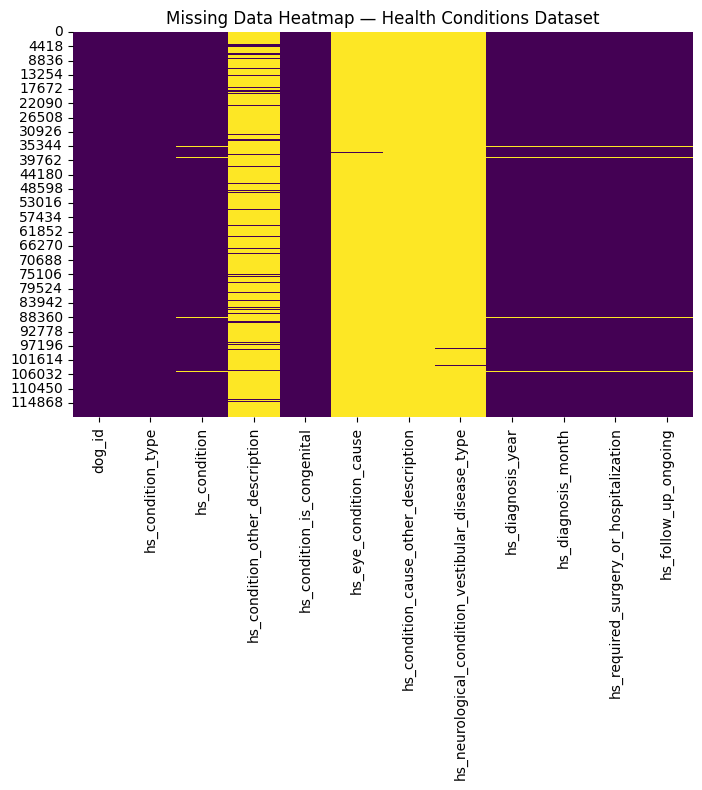

In [66]:
# number of missing data points per column
missing_data = health_conditions.isnull().sum()
missing_data = missing_data[missing_data > 0]
print(missing_data)

# heatmap of missing data points per column
plt.figure(figsize=(8, 5))
sns.heatmap(health_conditions.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap — Health Conditions Dataset")
plt.show()

<b>MULTIPLE APPEARANCES</b> <br>
Given that there are only 43517 dogs in this study and the health conditions dataset has over 119k rows, we can infer that many dogs appear in the health conditions dataset more than once. There are ~8700 dogs that appear once, ~7300 that appear twice, and ~5600 that appear 3 times. The number of dogs with each number of appearances decreases as number of appearances increases, though there is a small number of dogs that appear 20-30 times. Knowing the average time passed between these dogs' appearances would provide more insight about the regularity of the data distribution, but the data in this study does not include a date of recording. <br> 

<b>CONDITIONS</b> <br>
Of the 19 condition types in the health conditions dataset, the 3 most common condition types are of the skin, mouth/dental/oral, and infection/parasites. The 3 least common condition types all have under 1000 entries — immune-mediated, other congenital disorder, and hematopoietic.

   number_of_appearances  number_of_dogs
0                      1            8707
1                      2            7348
2                      3            5626
3                      4            4068
4                      5            2873
5                      6            1916
6                      7            1277
7                      8             897
8                      9             640
9                     10             408


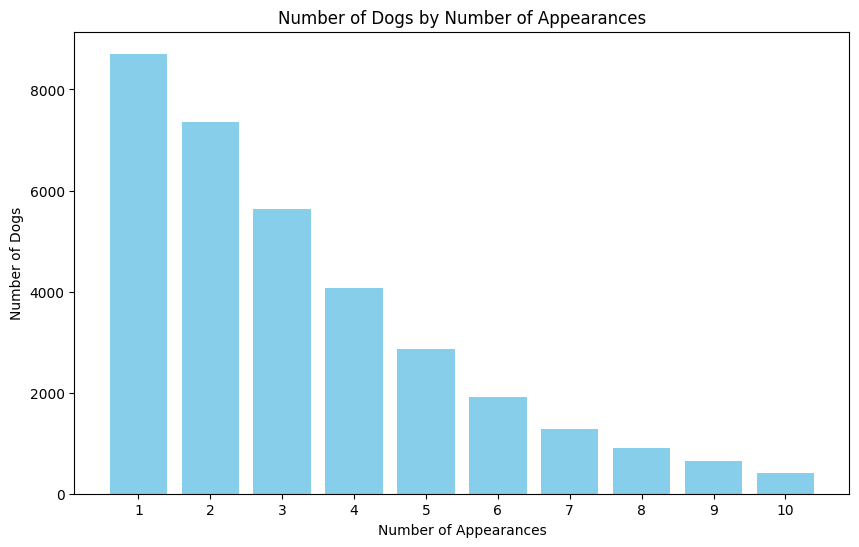

In [67]:
# counting the number of dogs that appear 1-10 times (bc there's 119k rows and only 43k dogs)
dog_appearances = health_conditions['dog_id'].value_counts()
appearance_counts = dog_appearances.value_counts().sort_index()
filtered_appearance_counts = appearance_counts[appearance_counts.index.isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])] # only include dogs that appear 1-10 times
full_appearance_counts = pd.Series(index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], data=0).add(filtered_appearance_counts, fill_value=0) # ensure all counts are represented, even if they are 0
appearance_counts_df = full_appearance_counts.reset_index() # converting to a DataFrame for readability
appearance_counts_df.columns = ['number_of_appearances', 'number_of_dogs']
print(appearance_counts_df)

# bar chart of number of dogs who appear 1-10 times
plt.figure(figsize=(10, 6))
plt.bar(appearance_counts_df['number_of_appearances'], appearance_counts_df['number_of_dogs'], color='skyblue')
plt.title('Number of Dogs by Number of Appearances')
plt.xlabel('Number of Appearances')
plt.ylabel('Number of Dogs')
plt.xticks(appearance_counts_df['number_of_appearances'])
plt.show()

In [68]:
# finding the distribution of each of the 20 health condition types
conditions_count = health_conditions['hs_condition_type'].value_counts()
conditions_labels = { # mapping from value numbers to descriptive labels
    1: 'Eye',
    2: 'Ear/Nose/Throat',
    3: 'Mouth/Dental/Oral',
    4: 'Skin',
    5: 'Cardiac',
    6: 'Respiratory',
    7: 'Gastrointestinal',
    8: 'Liver/Pancreas',
    9: 'Kidney/Urinary',
    10: 'Reproductive',
    11: 'Bone/Orthopedic',
    12: 'Brain/Neurologic',
    13: 'Endocrine',
    14: 'Hematopoietic',
    15: 'Other Congenital Disorder',
    16: 'Infection/Parasites',
    17: 'Toxin Consumption',
    18: 'Trauma',
    19: 'Immune-mediated'
}
conditions_count_df = conditions_count.reset_index()
conditions_count_df.columns = ['hs_condition_type', 'count']
conditions_count_df['hs_condition_type'] = conditions_count_df['hs_condition_type'].map(conditions_labels) # replacing the numeric values with labels
print(conditions_count_df)

            hs_condition_type  count
0                        Skin  18049
1           Mouth/Dental/Oral  18007
2         Infection/Parasites  15698
3                      Trauma  15023
4             Bone/Orthopedic  10069
5            Gastrointestinal   7709
6                         Eye   6950
7             Ear/Nose/Throat   5982
8           Toxin Consumption   5375
9              Kidney/Urinary   3936
10                    Cardiac   3333
11           Brain/Neurologic   2298
12                Respiratory   1797
13             Liver/Pancreas   1562
14                  Endocrine   1439
15               Reproductive   1165
16            Immune-mediated    358
17  Other Congenital Disorder    274
18              Hematopoietic    247


<h2>Reading DAP_2022_HLES_cancer_conditions_v1.0.csv</h2> 
The health condition dataset contains 90 columns and 2762 rows. <br> <br>

<b>UNIQUE DOGS</b> <br>
Counting the number of unique dog_id's that appear in the cancer conditions dataset, there are 2762 unique dogs in the dataset. <br>

<b>MISSING DATA</b> <br>
There are 13 columns with missing data, all regarding leukemia and lymphoma diagnoses. We can notice that there is significantly less data about leukemia and lymphoma diagnoses than other cancer conditions.

In [69]:
# turns the csv into a DataFrame
cancer_conditions = pd.read_csv('DAP_2022_HLES_cancer_conditions_v1.0.csv', low_memory=False)

# number of columns
num_columns = cancer_conditions.shape[1]
print(f"Number of rows: {len(cancer_conditions)}")
print(f"Number of columns: {num_columns}")

# counting the number of unique dogs in the dataset
num_unique_dogs_cancer = cancer_conditions['dog_id'].nunique()
print(f'Number of unique dog_id values: {num_unique_dogs_cancer}')

Number of rows: 2762
Number of columns: 90
Number of unique dog_id values: 2762


hs_cancer_locations_other_description                2562
hs_cancer_types_other_description                    2547
hs_leukemia_types_acute                              2756
hs_leukemia_types_chronic                            2756
hs_leukemia_types_unknown                            2756
hs_leukemia_types_other                              2756
hs_leukemia_types_other_description                  2762
hs_lymphoma_lymphosarcoma_types_b_cell               2687
hs_lymphoma_lymphosarcoma_types_t_cell               2687
hs_lymphoma_lymphosarcoma_types_t_zone               2687
hs_lymphoma_lymphosarcoma_types_unknown              2687
hs_lymphoma_lymphosarcoma_types_other                2687
hs_lymphoma_lymphosarcoma_types_other_description    2759
dtype: int64


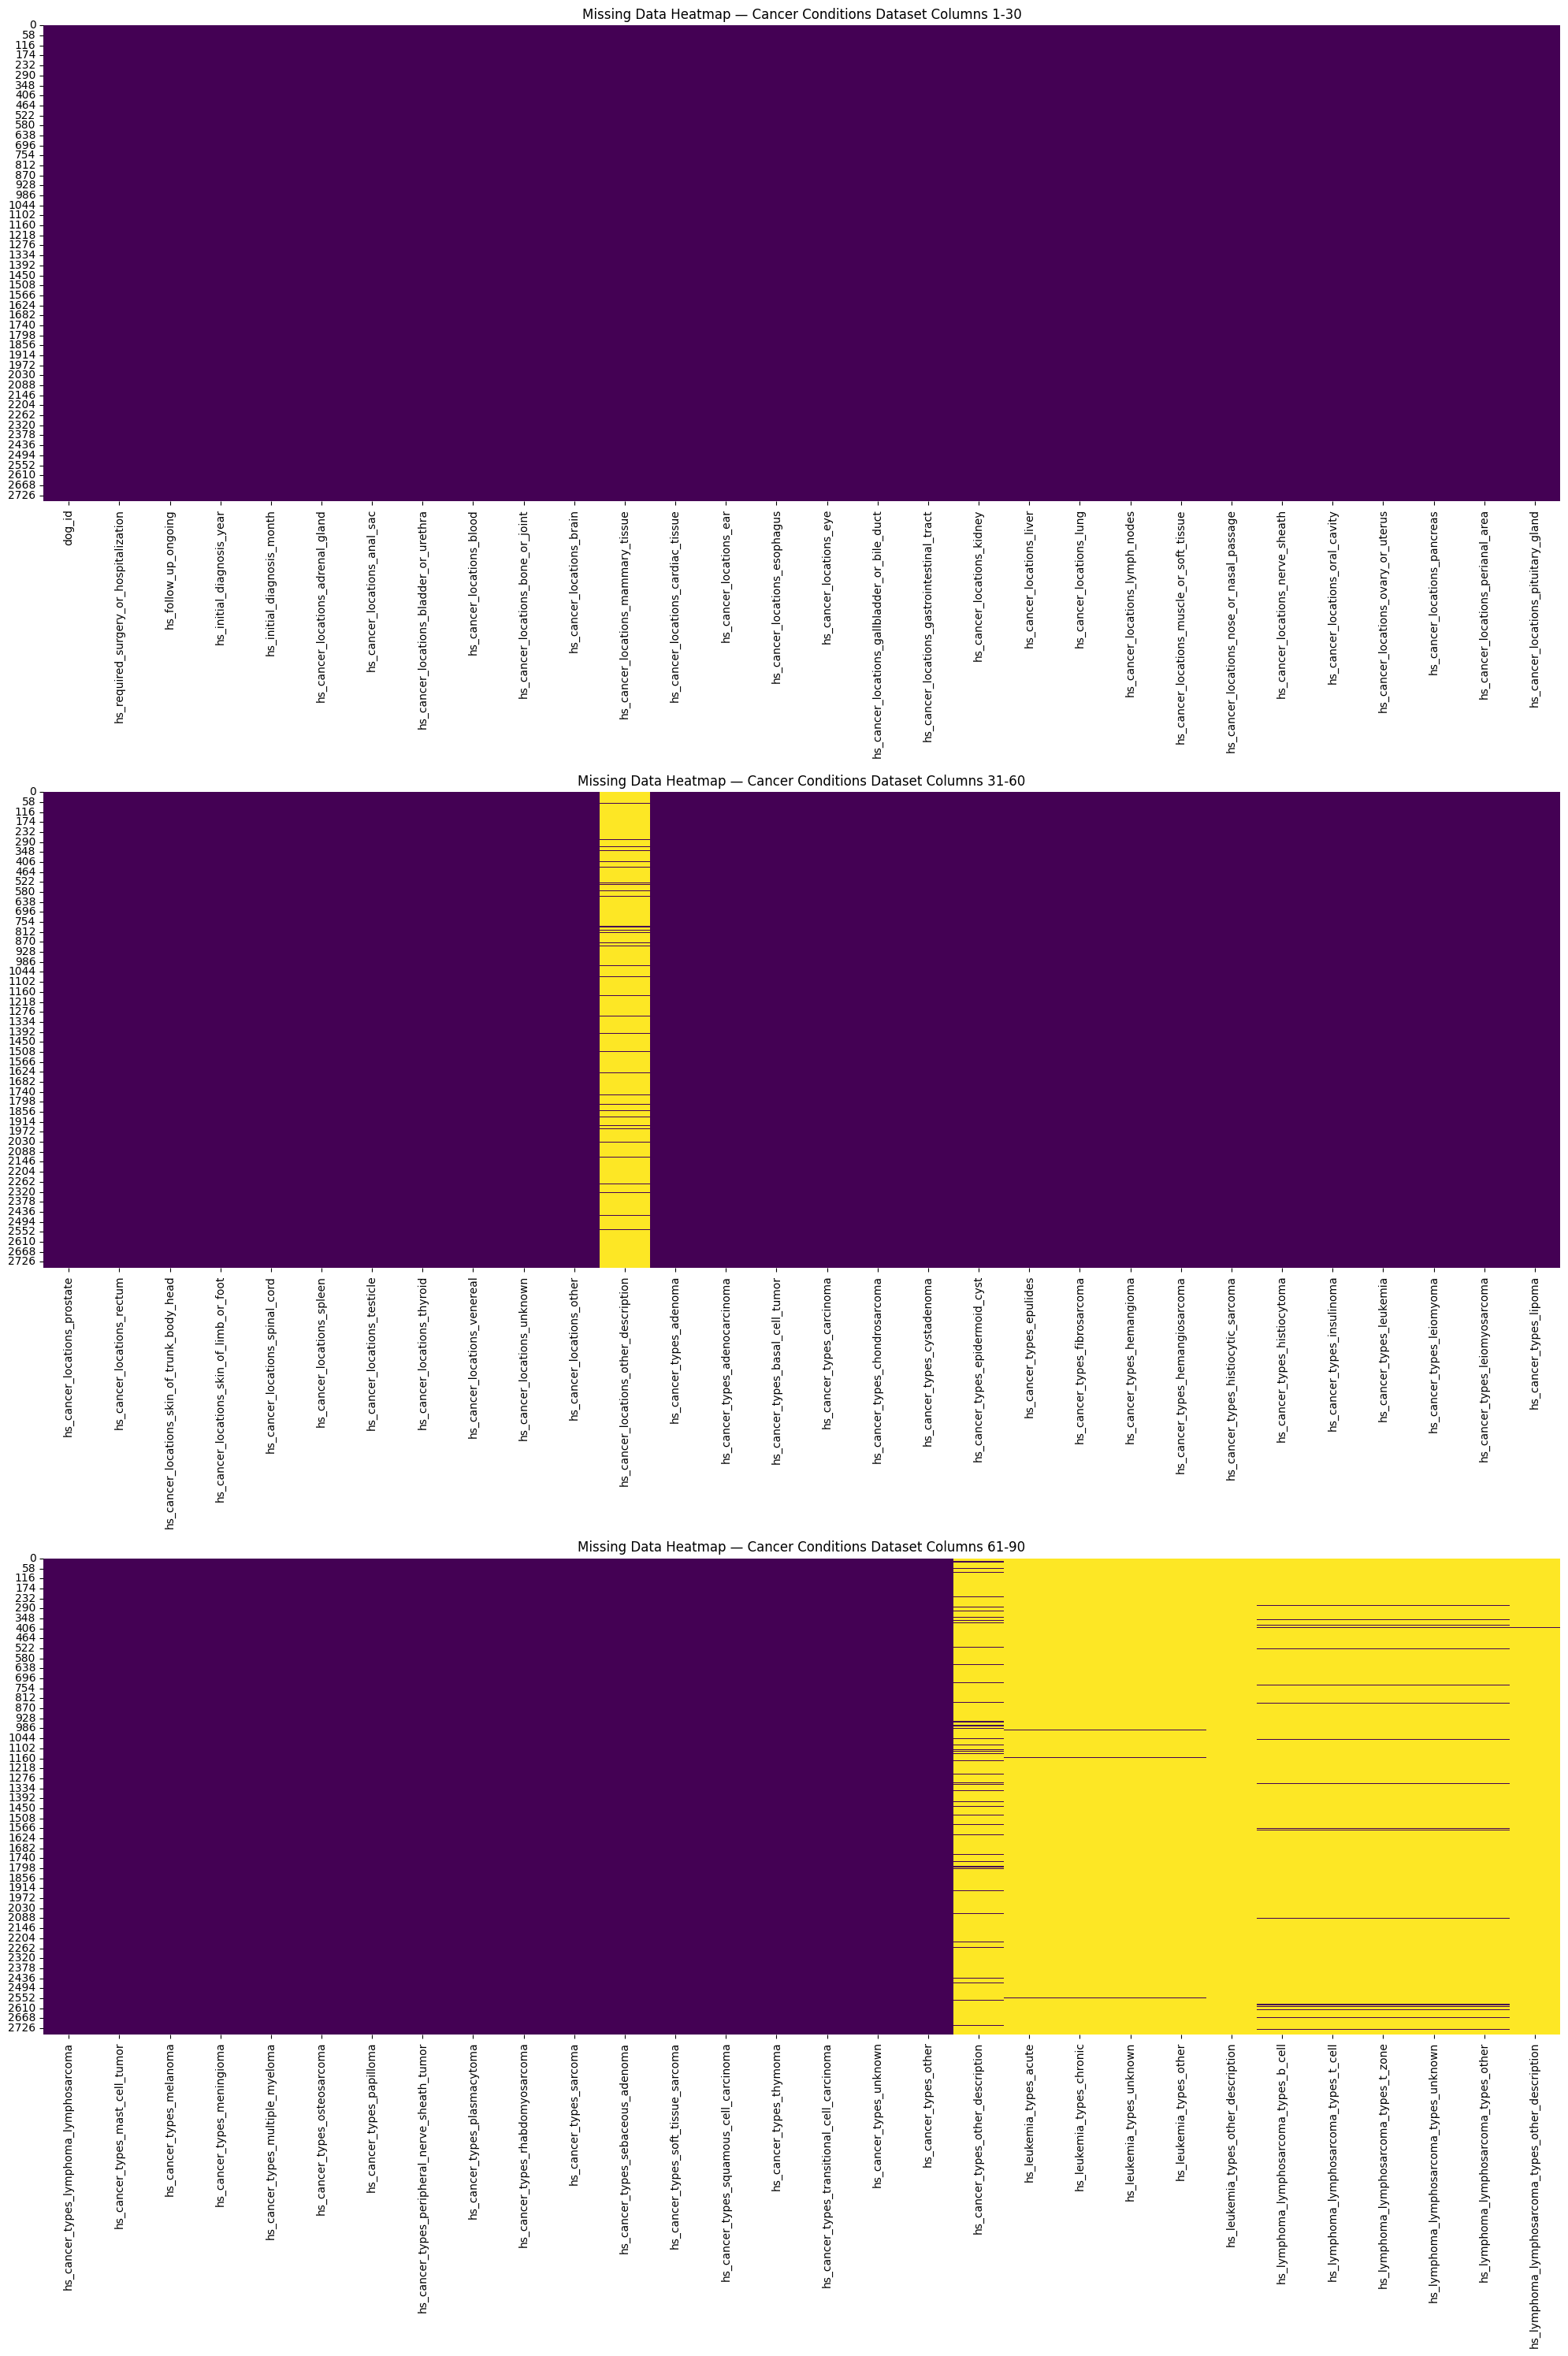

In [70]:
# number of missing data points per column
missing_data = cancer_conditions.isnull().sum()
missing_data = missing_data[missing_data > 0]
print(missing_data)

# heatmap of missing data points per column
cancer_conditions_1 = cancer_conditions.iloc[:, :30] # splitting the DataFrame into three parts so the heatmap is readable
cancer_conditions_2 = cancer_conditions.iloc[:, 30:60]
cancer_conditions_3 = cancer_conditions.iloc[:, 60:90]
fig, axes = plt.subplots(3, 1, figsize=(20, 30))  # creating a figure with three subplots
sns.heatmap(cancer_conditions_1.isnull(), cmap='viridis', cbar=False, ax=axes[0]) # first heatmap
axes[0].set_title("Missing Data Heatmap — Cancer Conditions Dataset Columns 1-30")
sns.heatmap(cancer_conditions_2.isnull(), cmap='viridis', cbar=False, ax=axes[1]) # second heatmap
axes[1].set_title("Missing Data Heatmap — Cancer Conditions Dataset Columns 31-60")
sns.heatmap(cancer_conditions_3.isnull(), cmap='viridis', cbar=False, ax=axes[2]) # third heatmap
axes[2].set_title("Missing Data Heatmap — Cancer Conditions Dataset Columns 61-90")
plt.tight_layout()
plt.show()

<b>MOST COMMON CANCER CONDITIONS</b> <br>
The most common cancer condition was of the skin of the trunk/body/head, followed by unknown, muscle or soft tissue, mast cell tumor, and skin of limb/foot. Notably, the second most commonly reported condition was cancer of unknown type. 

<b>LEAST COMMON CANCER CONDITIONS</b> <br>
The least common cancer conditions were other types of leukimia (not ALL or CLL), acute leukemia, rhabdomyosarcoma cancer, thymoma cancer, and other types of lymphoma lymphosarcoma (not T-cell, B-cell, or T-zone). The first three conditions had 0 True occurences in the dataset while the latter two conditions had 2 and 3 True occurences respectively.

In [71]:
# identifying the top 5 most common cancer conditions
omitted_columns = ['dog_id', 'hs_required_surgery_or_hospitalization', 'hs_follow_up_ongoing',
                  'hs_initial_diagnosis_year', 'hs_initial_diagnosis_month', 'hs_cancer_locations_other_description',
                  'hs_cancer_types_other_description', 'hs_leukemia_types_other_description', 
                  'hs_lymphoma_lymphosarcoma_types_other_description']
filtered_cancer_conditions = cancer_conditions.drop(columns=omitted_columns) # removing non-cancer-condition columns
num_true = filtered_cancer_conditions.apply(lambda x: (x == True)).sum() # counting the True occurences (boolean not string)
sorted_true = num_true.sort_values(ascending=False)
most_common_cancer_conditions = sorted_true.head(5)
least_common_cancer_conditions = sorted_true.tail(5)
print(f"Top 5 most common cancer conditions:\n{most_common_cancer_conditions}")
print(f"\nBottom 5 least common cancer conditions:\n{least_common_cancer_conditions}")

Top 5 most common cancer conditions:
hs_cancer_locations_skin_of_trunk_body_head    847
hs_cancer_types_unknown                        755
hs_cancer_locations_muscle_or_soft_tissue      571
hs_cancer_types_mast_cell_tumor                550
hs_cancer_locations_skin_of_limb_or_foot       419
dtype: int64

Bottom 5 least common cancer conditions:
hs_lymphoma_lymphosarcoma_types_other    3
hs_cancer_types_thymoma                  2
hs_cancer_types_rhabdomyosarcoma         0
hs_leukemia_types_acute                  0
hs_leukemia_types_other                  0
dtype: int64


In [72]:
# number of True's and False's for each survey question
true_false_count = {}
for col in filtered_cancer_conditions.columns:
    value_count = cancer_conditions[col].value_counts()
    true_count = value_count.get(True, 0)
    false_count = value_count.get(False, 0)
    true_false_count[col] = {'True': true_count, 'False': false_count}
true_false_counts_df = pd.DataFrame(true_false_count).transpose() # convert results dictionary to a DataFrame for better readability
pd.set_option('display.max_rows', None)
true_false_counts_df

,True,False
hs_cancer_locations_adrenal_gland,34,2728
hs_cancer_locations_anal_sac,76,2686
hs_cancer_locations_bladder_or_urethra,34,2728
hs_cancer_locations_blood,25,2737
hs_cancer_locations_bone_or_joint,110,2652
hs_cancer_locations_brain,20,2742
hs_cancer_locations_mammary_tissue,132,2630
hs_cancer_locations_cardiac_tissue,8,2754
hs_cancer_locations_ear,69,2693
hs_cancer_locations_esophagus,4,2758


<h2>Reading DAP_2022_ENVIRONMENT_v1.0.csv</h2>
The environment dataset contains 147 columns and 110030 rows. <br> <br>

<b>UNIQUE DOGS</b> <br>
Counting the number of unique dog_id's that appear in the environment dataset, there are 34574 unique dogs in the dataset. <br>

<b>MISSING DATA</b> <br>
There are 140 columns with missing data, but 138 of these columns have less than 4200 missing entries, which is <3.8% of the total entries. The other two columns walkscore and walkscore update date, which classify the walkability of the resident's address, both have 23796 missing rows. 

In [73]:
environment = pd.read_csv('DAP_2022_ENVIRONMENT_v1.0.csv', low_memory=False)

# number of columns
num_columns = environment.shape[1]
print(f"Number of rows: {len(environment)}")
print(f"Number of columns: {num_columns}")

# number of unique values per column
environment.nunique(axis=0)

# counting the number of unique dogs in the dataset
num_unique_dogs = health_conditions['dog_id'].nunique()
print(f'Number of unique dog_id values: {num_unique_dogs}')

environment.describe(include='all')

Number of rows: 110030
Number of columns: 147
Number of unique dog_id values: 34574


,dog_id,address_1_or_2,address_month,address_year,cv_area_sqmi,cv_data_year,cv_disadvantage_index,cv_gini_index,cv_median_income,cv_pct_below_125povline,...,tp_tmpc_norm_09,tp_tmpc_norm_10,tp_tmpc_norm_11,tp_tmpc_norm_12,wv_density_data_year,wv_housing_units,wv_res_density,wv_walkscore,wv_walkscore_date,wv_walkscore_descrip
count,110030.000000,110030.000000,110030.000000,110030.000000,108947.000000,108947.000000,108643.000000,108945.000000,108880.000000,108945.000000,...,108947.000000,108947.000000,108947.000000,108947.000000,108947.000000,108947.000000,108947.000000,86234.000000,86234,108947.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1506,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-29,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2707,NaN
mean,60070.145842,1.088703,10.236208,2020.596228,39.578781,2.152101,-0.488912,0.422968,85483.852030,12.487051,...,66.380242,56.156921,46.118480,37.717646,2.152111,2260.808347,2023.900307,28.901964,NaN,3.880860
std,33927.228894,0.284316,2.996129,0.673684,224.785460,0.777925,0.629526,0.062850,36852.321835,9.293983,...,7.650346,8.630603,9.494654,10.786668,0.777917,1131.629746,5872.811068,28.998910,NaN,0.913671
min,8.000000,1.000000,1.000000,2019.000000,0.015961,1.000000,-2.230000,0.074900,3901.000000,0.000000,...,37.800000,20.000000,4.400000,-1.400000,1.000000,12.000000,0.135076,0.000000,NaN,1.000000
25%,31453.000000,1.000000,9.000000,2020.000000,0.976261,2.000000,-0.970000,0.379600,59188.000000,5.930000,...,61.000000,49.600000,39.800000,30.100000,2.000000,1585.000000,152.395021,3.000000,NaN,4.000000
50%,61496.000000,1.000000,12.000000,2020.000000,2.558452,2.000000,-0.530000,0.418200,77859.500000,10.120000,...,65.200000,54.000000,44.000000,35.800000,2.000000,2072.000000,819.335677,19.000000,NaN,4.000000
75%,87109.000000,1.000000,12.000000,2021.000000,14.695550,3.000000,-0.070000,0.461300,103972.500000,16.470000,...,71.500000,61.700000,52.600000,45.100000,3.000000,2664.000000,1957.306484,50.000000,NaN,4.000000


cv_area_sqmi                       1083
cv_data_year                       1083
cv_disadvantage_index              1387
cv_gini_index                      1085
cv_median_income                   1150
cv_pct_below_125povline            1085
cv_pct_famsownchild_female_led     1385
cv_pct_female                      1083
cv_pct_hispanic                    1083
cv_pct_jobless16to64mf             1085
cv_pct_less_than_100k              1085
cv_pct_less_than_ba_degree         1083
cv_pct_nothispanic_asian           1083
cv_pct_nothispanic_black           1083
cv_pct_nothispanic_other           1083
cv_pct_nothispanic_two_or_more     1083
cv_pct_nothispanic_white           1083
cv_pct_nothispanica_ian            1083
cv_pct_nothispanicn_hpi            1083
cv_pct_owner_occupied              1083
cv_pct_same_house_1yrago           1085
cv_pct_us_born                     1083
cv_population_density              1083
cv_population_estimate             1083
cv_stability_index                 1085


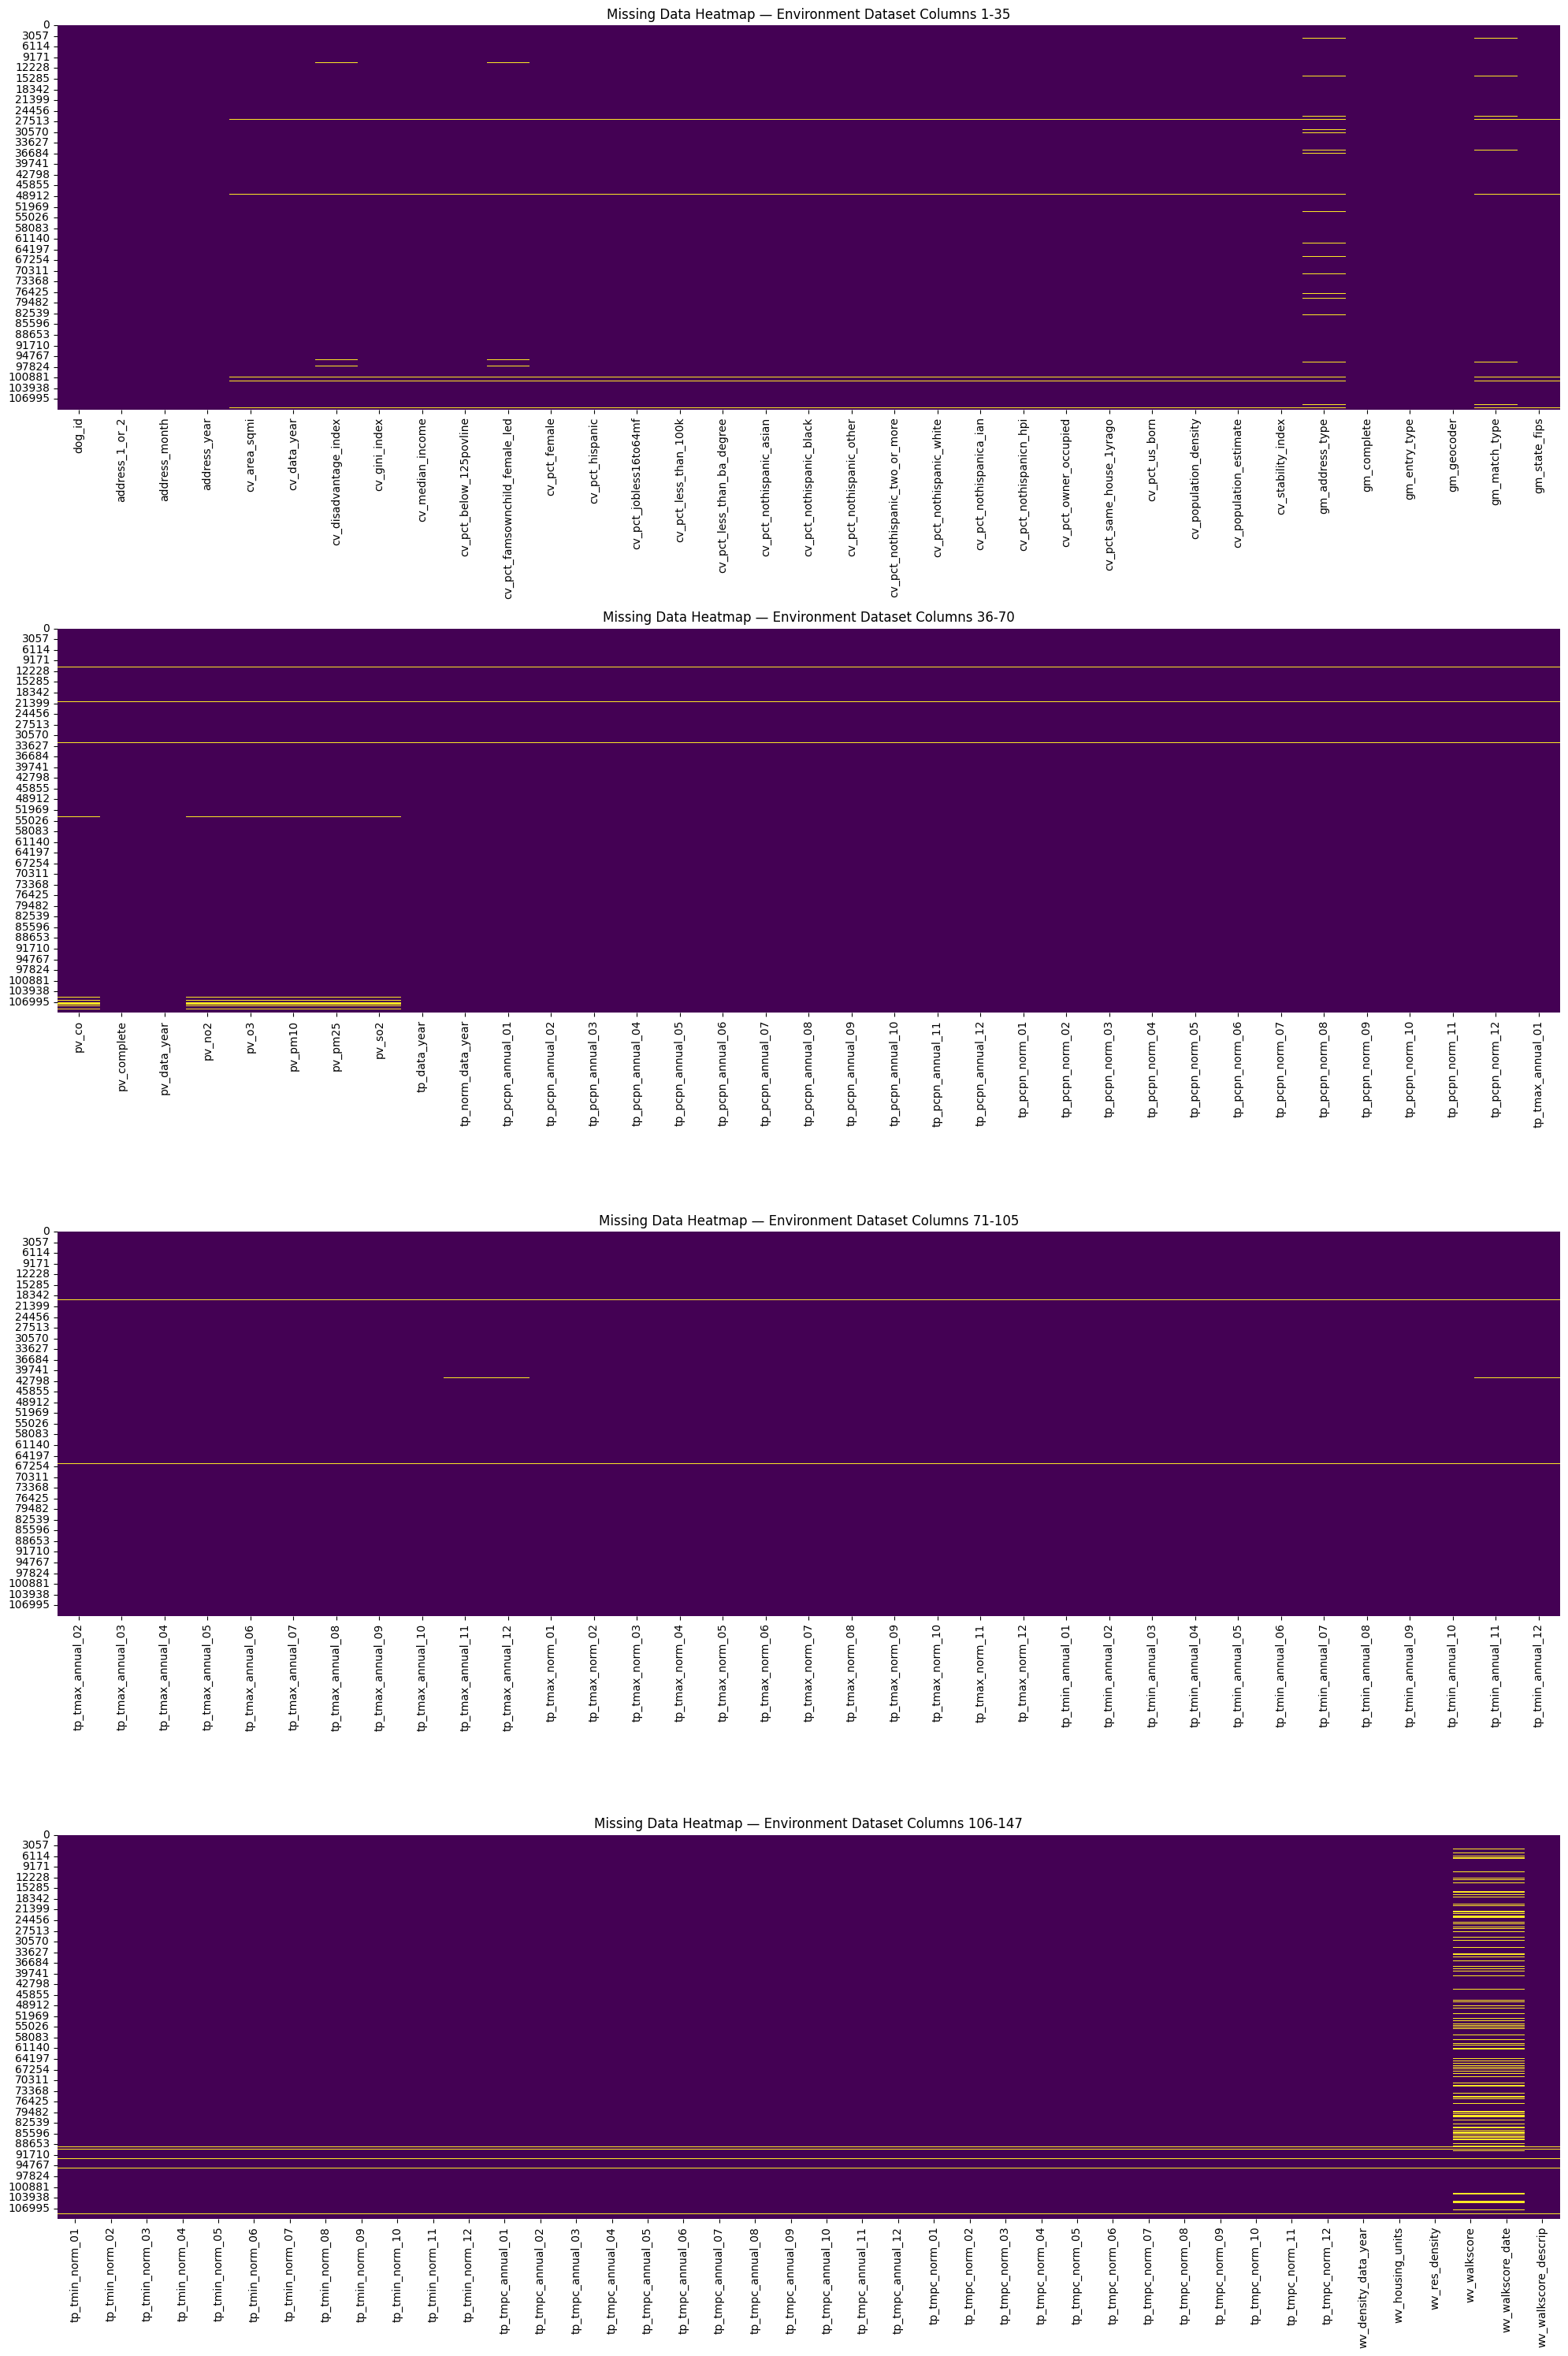

In [74]:
# number of missing data points per column
missing_data = environment.isnull().sum()
missing_data = missing_data[missing_data > 0]
print(missing_data)

# heatmap of missing data points per column
environment_1 = environment.iloc[:, :35] # splitting the DataFrame into three parts so the heatmap is readable
environment_2 = environment.iloc[:, 35:70]
environment_3 = environment.iloc[:, 70:105]
environment_4 = environment.iloc[:, 105:147]
fig, axes = plt.subplots(4, 1, figsize=(20, 30))  # creating a figure with three subplots
sns.heatmap(environment_1.isnull(), cmap='viridis', cbar=False, ax=axes[0]) # first heatmap
axes[0].set_title("Missing Data Heatmap — Environment Dataset Columns 1-35")
sns.heatmap(environment_2.isnull(), cmap='viridis', cbar=False, ax=axes[1]) # second heatmap
axes[1].set_title("Missing Data Heatmap — Environment Dataset Columns 36-70")
sns.heatmap(environment_3.isnull(), cmap='viridis', cbar=False, ax=axes[2]) # third heatmap
axes[2].set_title("Missing Data Heatmap — Environment Dataset Columns 71-105")
sns.heatmap(environment_4.isnull(), cmap='viridis', cbar=False, ax=axes[3]) # first heatmap
axes[3].set_title("Missing Data Heatmap — Environment Dataset Columns 106-147")
plt.tight_layout()
plt.show()

<b>MEDIAN INCOME</b> <br>
The average median income of all the participants in this study is approximately $85484. <br>

<b>PERCENT FEMALE</b> <br>
The average percentage of females of the participants' addresses in this study is approximately 50.75%. <br>

<b>STABILITY INDEX</b> <br>
The average stability index of the participants' addresses in this study is approximately 0.12. <br>

<b>DISADVANTAGE INDEX</b> <br>
The average disadvantage index of the participants' addresses in this study is approximately -0.49. <br>

<b>RACE</b> <br>
On average, the percentage of white residents of the participants' addresses in this study is ~73.60%. The average percentage of black residents is ~6.32%. The average percentage of asian residents is ~5.63%. The average percentage of hispanic residents is ~10.63%. We can notice that most of the study participants' neighborhoods are predominantly white, and that the average percentage of asian residents is the smallest.

In [75]:
# average median income 
avg_median_income = environment['cv_median_income'].mean()
print(f"Average median income: {avg_median_income}")

# average percent female  
avg_percent_female = environment['cv_pct_female'].mean()
print(f"\nAverage percent female: {avg_percent_female}")

# min, max, and average stability index 
min_stability_index = environment['cv_stability_index'].min() 
print(f"\nMinimum stability index: {min_stability_index}") 
max_stability_index = environment['cv_stability_index'].max() 
print(f"Maximum stability index: {max_stability_index}") 
avg_stability_index = environment['cv_stability_index'].mean() # what is the range of this value?
print(f"Average stability index: {avg_stability_index}") 

# min, max, and average disadvantage index 
min_disadvantage_index = environment['cv_disadvantage_index'].min() # what is the range of this value?
print(f"\nMinimum disadvantage index: {min_disadvantage_index}")
max_disadvantage_index = environment['cv_disadvantage_index'].max() # what is the range of this value?
print(f"Maximum disadvantage index: {max_disadvantage_index}")
avg_disadvantage_index = environment['cv_disadvantage_index'].mean() # what is the range of this value?
print(f"Average disadvantage index: {avg_disadvantage_index}")

Average median income: 85483.85202975753

Average percent female: 50.74958814836572

Minimum stability index: -4.0
Maximum stability index: 1.43
Average stability index: 0.11958988480425904

Minimum disadvantage index: -2.23
Maximum disadvantage index: 2.89
Average disadvantage index: -0.4889119409441933


Average percent white: 73.60149770071685
Average percent black: 6.322538114863191
Average percent asian: 5.632400983964682
Average percent hispanic: 10.625637420029923


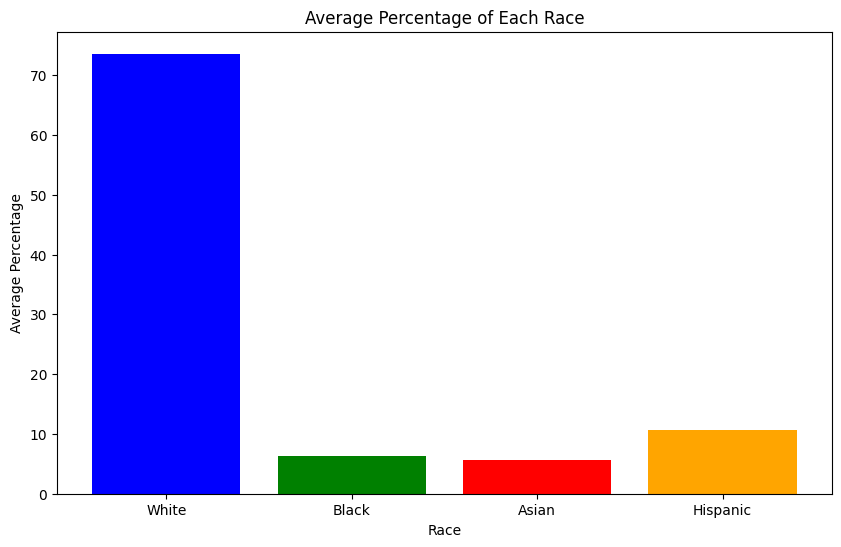

In [76]:
# average percent white 
avg_percent_white = environment['cv_pct_nothispanic_white'].mean()
print(f"Average percent white: {avg_percent_white}")
# average percent black 
avg_percent_black = environment['cv_pct_nothispanic_black'].mean()
print(f"Average percent black: {avg_percent_black}")
# average percent asian 
avg_percent_asian = environment['cv_pct_nothispanic_asian'].mean()
print(f"Average percent asian: {avg_percent_asian}")
# average percent hispanic
avg_percent_hispanic = environment['cv_pct_hispanic'].mean()
print(f"Average percent hispanic: {avg_percent_hispanic}")

# bar graph of the average race distribution
races = ['White', 'Black', 'Asian', 'Hispanic']
averages = [avg_percent_white, avg_percent_black, avg_percent_asian, avg_percent_hispanic]
plt.figure(figsize=(10, 6))
plt.bar(races, averages, color=['blue', 'green', 'red', 'orange'])
plt.title('Average Percentage of Each Race')
plt.xlabel('Race')
plt.ylabel('Average Percentage')
plt.show()

<h1>MOVED TO DAP_NOTEBOOK</h1>
<h2>Replication — Lifetime prevalence of owner-reported medical conditions in the 25 most common dog breeds in the Dog Aging Project pack</h2>
https://www.frontiersin.org/journals/veterinary-science/articles/10.3389/fvets.2023.1140417/full#h13

<b>DATA</b> <br>
Forsyth et al. (2023) used an older version of the Dog Aging Project data release which is now unavailable, but specified it was "data collected from 27,541 dogs enrolled in the DAP Pack between December 26, 2019 and December 31, 2020." Filtering the 2022 Curated Data Release for data between these two dates, we find 27,460 rows and 35 columns. <br>

The distribution of pure vs mixed breed dogs in our dataset is slightly different than that of Forsyth et al. (2023)'s. We count 14277 purebred dogs (52.0%) and 13233 mixed breed dogs (48.0%), while Forsyth et al. (2023) counted 13618 purebred dogs (49.4%) and 13,923 mixed breed dogs (50.6%). 

Now, using an inner join to merge the dog overview dataset with the health and cancer conditions datasets based on the column dog_id, we find only 1746 rows and 135 columns.

In [77]:
# filtering data to the rows included in "Lifetime prevalence of owner-reported medical conditions in the 25 most common dog breeds in the Dog Aging Project pack"
# "...data collected from 27,541 dogs enrolled in the DAP Pack between December 26, 2019 and December 31, 2020."
dog_overview['DAP_Pack_Date'] = pd.to_datetime(dog_overview['DAP_Pack_Date'], format='%Y-%m-%d')
overview_2020 = dog_overview.loc[(dog_overview['DAP_Pack_Date']>='2019-12-26') & (dog_overview['DAP_Pack_Date']<='2020-12-31')]
print(f"Dog overview: {len(overview_2020)} rows, {overview_2020.shape[1]} columns")

# number of mixed vs pure bred dogs in the filtered overview dataset
overview_mixed_pure_count = overview_2020['Breed_Class'].value_counts()
overview_mixed_count = overview_mixed_pure_count.iloc[0]
overview_pure_count = overview_mixed_pure_count.iloc[1]
print(f'Number of purebred dogs (AKC-Recognized) in dog_overview: {overview_mixed_count}')
print(f'Number of mixed breed dogs (Non-AKC-Recognized) in dog_overview: {overview_pure_count}')

Dog overview: 27460 rows, 35 columns
Number of purebred dogs (AKC-Recognized) in dog_overview: 14227
Number of mixed breed dogs (Non-AKC-Recognized) in dog_overview: 13233


In [78]:
# merging dog overview with health conditions 
df_merge1 = pd.merge(overview_2020, health_conditions, on='dog_id', how='inner')
print(f"Merged overview and health: {len(df_merge1)} rows, {df_merge1.shape[1]} columns")

# number of mixed vs pure bred dogs
mixed_pure_count = df_merge1['Breed_Class'].value_counts()
mixed_count = mixed_pure_count.iloc[0]
pure_count = mixed_pure_count.iloc[1]
print(f'Number of purebred dogs (AKC-Recognized): {pure_count}')
print(f'Number of mixed breed dogs (Non-AKC-Recognized): {mixed_count}')

Merged overview and health: 77507 rows, 46 columns
Number of purebred dogs (AKC-Recognized): 37614
Number of mixed breed dogs (Non-AKC-Recognized): 39893


In [79]:
df = pd.merge(overview_2020, cancer_conditions, on='dog_id', how='inner')
print(f"Merged dataset: {len(df)} rows, {df.shape[1]} columns")

Merged dataset: 1746 rows, 124 columns


<h3>NOTE: I tested the same merge with the dog owner dataset instead of the dow overview dataset, and the number of rows was exactly the same. </h3>

In [80]:
# filtering data to the rows included in "Lifetime prevalence of owner-reported medical conditions in the 25 most common dog breeds in the Dog Aging Project pack"
# "...data collected from 27,541 dogs enrolled in the DAP Pack between December 26, 2019 and December 31, 2020."
dog_owner['st_hles_completion_date'] = pd.to_datetime(dog_owner['st_hles_completion_date'], format='%Y-%m-%d')
overview_2020_test = dog_owner.loc[(dog_owner['st_hles_completion_date']>='2019-12-26') & (dog_owner['st_hles_completion_date']<='2020-12-31')]
print(f"Dog owner (TEST): {len(overview_2020_test)} rows, {overview_2020_test.shape[1]} columns")

# merging owner with health
df_merge1_test = pd.merge(overview_2020_test, health_conditions, on='dog_id', how='inner')
print(f"Merged dataset (TEST): {len(df_merge1_test)} rows, {df_merge1_test.shape[1]} columns")

# number of mixed vs pure bred dogs
mixed_pure_count_test = df_merge1_test['dd_breed_pure_or_mixed'].value_counts()
mixed_count_test = mixed_pure_count_test.iloc[0]
pure_count_test = mixed_pure_count_test.iloc[1]
print(f'Number of purebred dogs (AKC-Recognized) (TEST): {pure_count}')
print(f'Number of mixed breed dogs (Non-AKC-Reognized (TEST): {mixed_count}')

# merging owner and health with cancer
df_test = pd.merge(overview_2020_test, cancer_conditions, on='dog_id', how='inner')
print(f"Merged dataset (TEST): {len(df_test)} rows, {df_test.shape[1]} columns")

Dog owner (TEST): 27460 rows, 933 columns
Merged dataset (TEST): 77507 rows, 944 columns
Number of purebred dogs (AKC-Recognized) (TEST): 37614
Number of mixed breed dogs (Non-AKC-Reognized (TEST): 39893
Merged dataset (TEST): 1746 rows, 1022 columns
